In [2]:
import requests
import pandas as pd 
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
from tmdb_apikey import api_key
from bs4 import BeautifulSoup

In [3]:
# gather the movie titles and movie IDs using the API. The IDs give the full details of the movie.
movies = []
movies_id = []
for i in range(13):
    response = requests.get('https://api.themoviedb.org/3/movie/top_rated?', params={'api_key': api_key, 'page': i+1})
    r = response.json()
    for film in r['results']:
        movies.append(film['title'])
        movies_id.append(film['id'])
        if len(movies) == 250:
            break
        if len(movies_id) == 250:
            break

In [4]:
response = requests.get('https://api.themoviedb.org/3/movie/' + str(movies_id[1]), params={'api_key': api_key})
response.json()

{'adult': False,
 'backdrop_path': '/kXfqcdQKsToO0OUXHcrrNCHDBzO.jpg',
 'belongs_to_collection': None,
 'budget': 25000000,
 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name': 'Crime'}],
 'homepage': '',
 'id': 278,
 'imdb_id': 'tt0111161',
 'original_language': 'en',
 'original_title': 'The Shawshank Redemption',
 'overview': 'Framed in the 1940s for the double murder of his wife and her lover, upstanding banker Andy Dufresne begins a new life at the Shawshank prison, where he puts his accounting skills to work for an amoral warden. During his long stretch in prison, Dufresne comes to be admired by the other inmates -- including an older prisoner named Red -- for his integrity and unquenchable sense of hope.',
 'popularity': 113.555,
 'poster_path': '/q6y0Go1tsGEsmtFryDOJo3dEmqu.jpg',
 'production_companies': [{'id': 97,
   'logo_path': '/7znWcbDd4PcJzJUlJxYqAlPPykp.png',
   'name': 'Castle Rock Entertainment',
   'origin_country': 'US'}],
 'production_countries': [{'iso_3166_

In [5]:
# collect data for all relevant parameters for our analysis
movies_revenue = []
ratings = []
release_dates = []
budget = []
genres = []
source = []
runtime = []
imdb_id = []
users_rated = []
for i in range(250):
    response = requests.get('https://api.themoviedb.org/3/movie/' + str(movies_id[i]), params={'api_key': api_key})
    r = response.json()
    ratings.append(round(r['vote_average']*10))
    release_dates.append(r['release_date'])
    runtime.append(r['runtime'])
    list_genres = []
    imdb_id.append(r['imdb_id'])
    if r['vote_count']<50:
        users_rated.append('Fewer than 50 ratings')
    if 50<=r['vote_count']<100:
        users_rated.append('50+ ratings')
    if 100<=r['vote_count']<250:
        users_rated.append('100+ ratings')
    if 250<=r['vote_count']<500:
        users_rated.append('250+ ratings')
    if 500<=r['vote_count']<1000:
        users_rated.append('500+ ratings')
    if 1000<=r['vote_count']<2500:
        users_rated.append('1000+ ratings')
    if 2500<=r['vote_count']<5000:
        users_rated.append('2500+ ratings')
    if 5000<=r['vote_count']<10000:
        users_rated.append('5000+ ratings')
    if 10000<=r['vote_count']<25000:
        users_rated.append('10000+ ratings')
    if 25000<=r['vote_count']<50000:
        users_rated.append('25000+ ratings')
    if 50000<=r['vote_count']<100000:
        users_rated.append('50000+ ratings')
    if 100000<=r['vote_count']<250000:
        users_rated.append('100000+ ratings')
    if 250000<=r['vote_count']:
        users_rated.append('250000+ ratings')

    for i in range(len(r['genres'])):
        if r['genres'][i]['name'] == 'Science Fiction':
            list_genres.append('Sci-Fi')
        else:
            list_genres.append(r['genres'][i]['name'])
    # many films have more than one genre, some have just one. For those films with more than one, they are put in a list, then place in the list of genres. For those films with one genre, they were just put in the list of genres
    if len(list_genres)>1:
        genres.append(list_genres)
    elif len(list_genres)==1:
        genres.append(str(list_genres).strip("['']"))
    if r['budget']>0:
        budget.append(r['budget'])
    else:
        budget.append(None)
    if r['revenue']>0:
        movies_revenue.append(r['revenue'])
    else:
        movies_revenue.append(None)
    source.append('TMDB')

In [6]:
directors = []
for i in range(250):
    response = requests.get('https://api.themoviedb.org/3/movie/' + str(movies_id[i]) + '/credits?', params={'api_key':api_key})
    r = response.json()
    list_directors = []
    for d in r['crew']:
        if d['job'] == 'Director':
            list_directors.append(d['name'])
    directors.append(list_directors)
    if len(directors[i])==1:
        directors[i] = str(directors[i]).strip("['']")
# those films with more than one director were placed in a list, those films with just one director were just placed in the list of directors

In [7]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

In [8]:
# Wherever possible, replace missing revenue values with the values found in IMDb for the movie
for i in range(250):
    if movies_revenue[i] == None:
        response = requests.get('https://www.imdb.com/title/' + str(imdb_id[i]), headers=headers)
        soup = BeautifulSoup(response.content, 'html.parser')
        try:
            s = soup.find('li', attrs={'class':'ipc-metadata-list__item sc-6d4f3f8c-2 byhjlB', 'role':"presentation", 'data-testid':"title-boxoffice-cumulativeworldwidegross"})
            ms = (s.get_text()).replace('Gross worldwide', '')
            movies_revenue[i] = int((ms.replace(',', ''))[1:])
        except:
            continue
movies_revenue


[245066411,
 28341469,
 102600000,
 100000000,
 321365567,
 2028077,
 274925095,
 1000000,
 357986087,
 257591776,
 1004558444,
 286801374,
 214179088,
 25253888,
 677387716,
 1118888979,
 1385351,
 46835000,
 None,
 346300,
 None,
 None,
 11990401,
 230098753,
 516962,
 32052925,
 5472914,
 None,
 100853753,
 17288993,
 197251,
 48045728,
 108981275,
 30641770,
 None,
 15222,
 375464627,
 236049757,
 701729206,
 30156463,
 871368364,
 None,
 538400000,
 4903192,
 120072577,
 926287400,
 13092000,
 327311859,
 None,
 825532764,
 5000000,
 37034514,
 20000000,
 None,
 23875127,
 820278,
 55240,
 11000000,
 272742922,
 159414369,
 20339624,
 46808,
 4250000,
 None,
 45284974,
 235860116,
 1315376,
 381109762,
 None,
 None,
 463618,
 92600000,
 36368,
 43862,
 10195760,
 168817,
 480000000,
 5380118,
 92300000,
 1488732821,
 112536,
 1266570,
 33187,
 87212911,
 930363,
 150000000,
 None,
 21057208,
 19289062,
 5252,
 426588510,
 77430,
 24012,
 15194593,
 3494070,
 2794731755,
 205241503

In [9]:
year_releases = []
for i in range(250):
    year_releases.append(release_dates[i][:4])


In [10]:
year_releases

['1972',
 '1994',
 '1974',
 '1995',
 '1993',
 '2022',
 '2001',
 '1957',
 '2016',
 '2019',
 '2008',
 '1999',
 '1994',
 '1966',
 '1994',
 '2003',
 '2016',
 '1990',
 '2019',
 '1954',
 '2022',
 '2020',
 '1988',
 '1997',
 '1988',
 '1960',
 '1984',
 '2020',
 '1999',
 '2022',
 '2021',
 '2019',
 '1975',
 '2002',
 '2020',
 '1962',
 '2018',
 '2004',
 '2014',
 '2016',
 '2001',
 '2011',
 '1980',
 '2000',
 '2002',
 '2002',
 '2014',
 '1995',
 '2013',
 '2010',
 '1950',
 '1954',
 '1997',
 '2018',
 '1998',
 '2020',
 '1952',
 '1940',
 '1991',
 '1997',
 '2020',
 '1963',
 '1931',
 '2022',
 '1994',
 '1989',
 '2019',
 '1985',
 '2020',
 '1964',
 '1936',
 '2019',
 '1940',
 '2020',
 '2019',
 '1985',
 '2022',
 '1968',
 '2021',
 '2022',
 '1997',
 '2020',
 '1960',
 '2021',
 '2020',
 '1979',
 '2020',
 '1998',
 '2019',
 '1957',
 '2011',
 '1991',
 '2019',
 '2003',
 '2014',
 '2019',
 '2018',
 '2020',
 '1994',
 '1946',
 '2019',
 '2018',
 '1974',
 '1966',
 '2016',
 '2018',
 '2012',
 '2019',
 '1962',
 '2019',
 '2020',
 

In [37]:
data = {'title': movies[:250], 'director': directors[:250], 'genre': genres[:250], 'user_rating': ratings[:250], 'revenue': movies_revenue[:250], 'release date': release_dates[:250], 'length': runtime[:250], 'source': source[:250], 'votes': users_rated, 'year': year_releases}

In [38]:
df = pd.DataFrame(data)
df['revenue'] = df['revenue'].div(1000000).round(2)
df.to_csv('tmdb_raw_data.csv')
df

,title,director,genre,user_rating,revenue,release date,length,source,votes,year
0,The Godfather,Francis Ford Coppola,"[Drama, Crime]",87,245.07,1972-03-14,175,TMDB,10000+ ratings,1972
1,The Shawshank Redemption,Frank Darabont,"[Drama, Crime]",87,28.34,1994-09-23,142,TMDB,10000+ ratings,1994
2,The Godfather Part II,Francis Ford Coppola,"[Drama, Crime]",86,102.60,1974-12-20,202,TMDB,10000+ ratings,1974
3,Dilwale Dulhania Le Jayenge,Aditya Chopra,"[Comedy, Drama, Romance]",86,100.00,1995-10-19,190,TMDB,2500+ ratings,1995
4,Schindler's List,Steven Spielberg,"[Drama, History, War]",86,321.37,1993-12-15,195,TMDB,10000+ ratings,1993
...,...,...,...,...,...,...,...,...,...,...
245,"Toto, Peppino, and the Hussy",Camillo Mastrocinque,"[Comedy, Romance]",81,NaN,1956-08-23,101,TMDB,250+ ratings,1956
246,The Best of Youth,Marco Tullio Giordana,"[Drama, History, Romance]",81,2.69,2003-06-22,366,TMDB,250+ ratings,2003
247,El mesero,Raúl Martínez,Comedy,81,3.10,2021-07-15,86,TMDB,250+ ratings,2021
248,The Elephant Man,David Lynch,"[Drama, History]",81,26.01,1980-10-09,124,TMDB,2500+ ratings,1980


In [39]:
# separate films by director (some films have more than one director, so this dataframe separate those lists)
df_sep_directors = df.explode('director')
df_sep_directors.to_csv('tmb_dir_sep.csv')
df_sep_directors

,title,director,genre,user_rating,revenue,release date,length,source,votes,year
0,The Godfather,Francis Ford Coppola,"[Drama, Crime]",87,245.07,1972-03-14,175,TMDB,10000+ ratings,1972
1,The Shawshank Redemption,Frank Darabont,"[Drama, Crime]",87,28.34,1994-09-23,142,TMDB,10000+ ratings,1994
2,The Godfather Part II,Francis Ford Coppola,"[Drama, Crime]",86,102.60,1974-12-20,202,TMDB,10000+ ratings,1974
3,Dilwale Dulhania Le Jayenge,Aditya Chopra,"[Comedy, Drama, Romance]",86,100.00,1995-10-19,190,TMDB,2500+ ratings,1995
4,Schindler's List,Steven Spielberg,"[Drama, History, War]",86,321.37,1993-12-15,195,TMDB,10000+ ratings,1993
...,...,...,...,...,...,...,...,...,...,...
245,"Toto, Peppino, and the Hussy",Camillo Mastrocinque,"[Comedy, Romance]",81,NaN,1956-08-23,101,TMDB,250+ ratings,1956
246,The Best of Youth,Marco Tullio Giordana,"[Drama, History, Romance]",81,2.69,2003-06-22,366,TMDB,250+ ratings,2003
247,El mesero,Raúl Martínez,Comedy,81,3.10,2021-07-15,86,TMDB,250+ ratings,2021
248,The Elephant Man,David Lynch,"[Drama, History]",81,26.01,1980-10-09,124,TMDB,2500+ ratings,1980


In [40]:
df_sep_genre = df.explode('genre')
df_sep_genre.to_csv('tmdb_genre_sep.csv')
df_sep_genre

,title,director,genre,user_rating,revenue,release date,length,source,votes,year
0,The Godfather,Francis Ford Coppola,Drama,87,245.07,1972-03-14,175,TMDB,10000+ ratings,1972
0,The Godfather,Francis Ford Coppola,Crime,87,245.07,1972-03-14,175,TMDB,10000+ ratings,1972
1,The Shawshank Redemption,Frank Darabont,Drama,87,28.34,1994-09-23,142,TMDB,10000+ ratings,1994
1,The Shawshank Redemption,Frank Darabont,Crime,87,28.34,1994-09-23,142,TMDB,10000+ ratings,1994
2,The Godfather Part II,Francis Ford Coppola,Drama,86,102.60,1974-12-20,202,TMDB,10000+ ratings,1974
...,...,...,...,...,...,...,...,...,...,...
247,El mesero,Raúl Martínez,Comedy,81,3.10,2021-07-15,86,TMDB,250+ ratings,2021
248,The Elephant Man,David Lynch,Drama,81,26.01,1980-10-09,124,TMDB,2500+ ratings,1980
248,The Elephant Man,David Lynch,History,81,26.01,1980-10-09,124,TMDB,2500+ ratings,1980
249,The Passion of Joan of Arc,Carl Theodor Dreyer,Drama,81,0.02,1928-04-21,110,TMDB,500+ ratings,1928


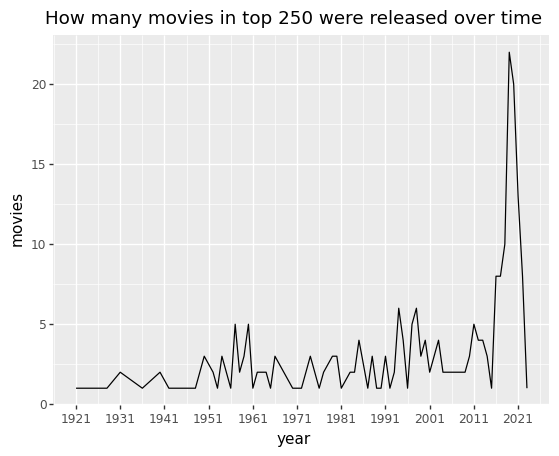

<ggplot: (8785994172200)>

In [41]:
# when were the top 250 TMDB films released?
year_df = df.groupby('year')['title'].count().reset_index(inplace=False, drop=False)
year_df['year'] = year_df['year'].astype(int)
year_df['title'].astype(int)
year_df

(
    ggplot(year_df)
    + geom_line(aes(x='year', y='title', group=1))
    +labs(x='year', y='movies')
    + scale_x_continuous(breaks=range(1921, 2023, 10))
    + ggtitle('How many movies in top 250 were released over time')
)

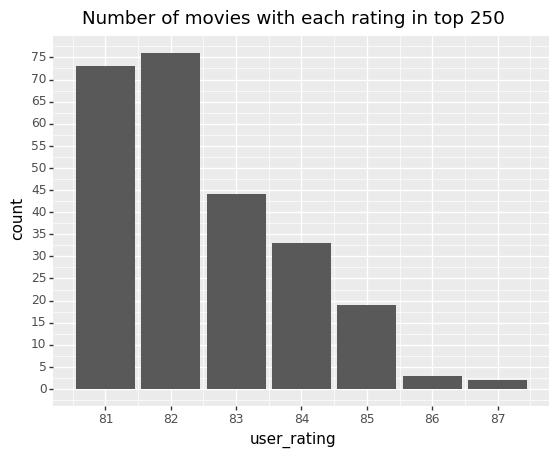

<ggplot: (8785993560884)>

In [16]:
# How many movies with a specific rating in TMDB
ggplot(df) + aes(x="user_rating") + stat_bin(bins=55) + geom_bar() + ggtitle('Number of movies with each rating in top 250') + scale_x_continuous(breaks=range(81, 100, 1)) + scale_y_continuous(breaks=range(0, 80, 5))

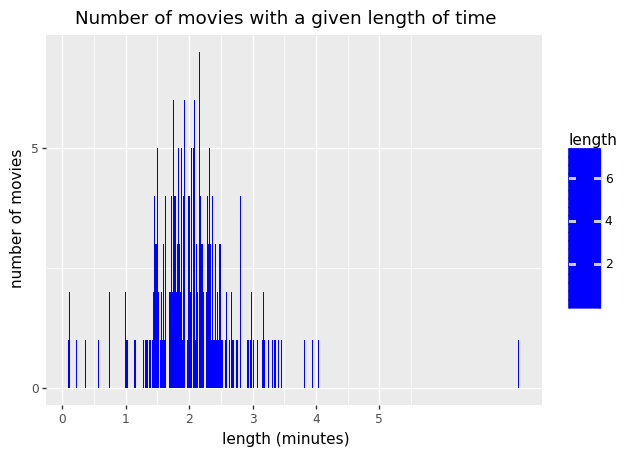

<ggplot: (8786029053329)>

In [17]:
length_df = df.groupby('length')['title'].count().reset_index(inplace=False, drop=False)
length_df['length'] = length_df['length'].astype(int) / 60
(
    ggplot(length_df, aes(x='length', y='title', fill='length'))
    + geom_bar(stat='identity')
    +labs(x='length (minutes)', y='number of movies')
    #+labs(x='rating')
    + scale_x_continuous(breaks=list(range(0, 6, 1)))
    + scale_y_continuous(breaks=range(0, 200, 5))
    + scale_fill_gradient(low='blue', high='blue')
    + ggtitle('Number of movies with a given length of time')
)

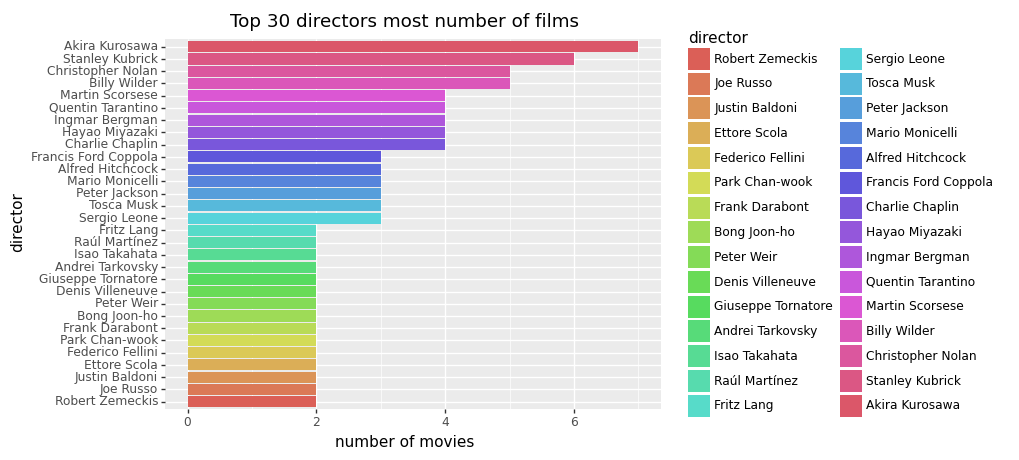

<ggplot: (8785993662871)>

In [48]:
# Which 30 directors had the most number of movies in the top 250
director_count_df = df_sep_directors.groupby('director')['title'].count().sort_values(ascending=False).reset_index(inplace=False, drop=False)
df_top_30_directors = director_count_df.head(30).sort_values('title', ascending=False)
df_top_30_directors['director'] = pd.Categorical(df_top_30_directors['director'], categories=df_top_30_directors['director'][::-1])
ggplot(df_top_30_directors, aes(x='director', y='title', fill='director'))+ \
geom_bar(stat='identity') + \
labs(x='director', y='number of movies')  + \
coord_flip() + \
scale_x_discrete() + \
ggtitle('Top 30 directors most number of films')

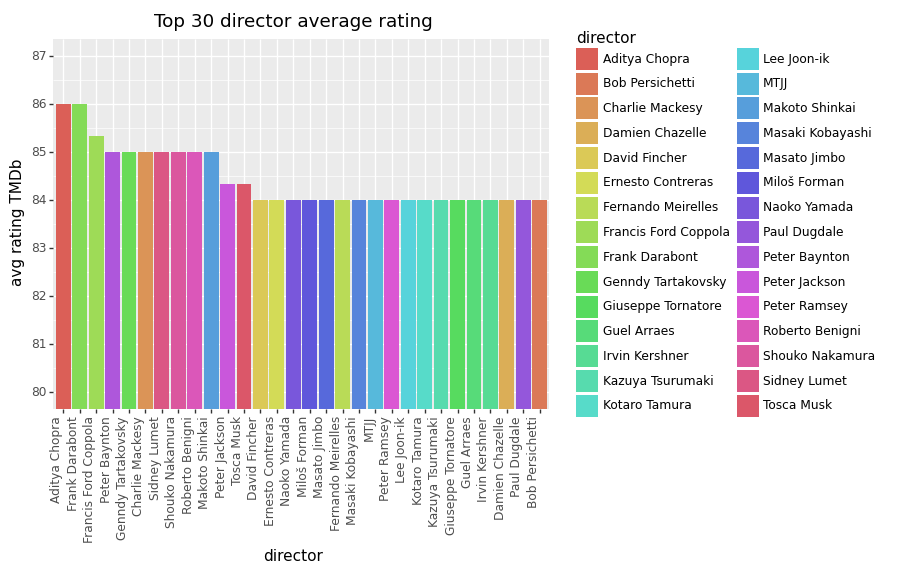

<ggplot: (8785994115006)>

In [19]:
# top 30 directors in terms of average rating
director_avg_rating_df = df_sep_directors.groupby('director')['user_rating'].mean().sort_values(ascending=False).head(30).reset_index(drop=False, inplace=False)
director_avg_rating_df['user_rating'] = director_avg_rating_df['user_rating'].astype(float)



ggplot(director_avg_rating_df, aes(x='director', y='user_rating', fill='director'))+ \
geom_bar(stat='identity') + \
labs(x='director', y='avg rating TMDb')  + \
coord_flip() + \
scale_y_continuous(breaks=range(70, 100, 1)) + \
coord_cartesian(ylim=(80, 87)) + \
scale_x_discrete(limits=director_avg_rating_df['director'][director_avg_rating_df['user_rating'] >= 0].tolist()) + \
theme(axis_text_x=element_text(rotation=90, hjust=1)) + \
ggtitle('Top 30 director average rating')

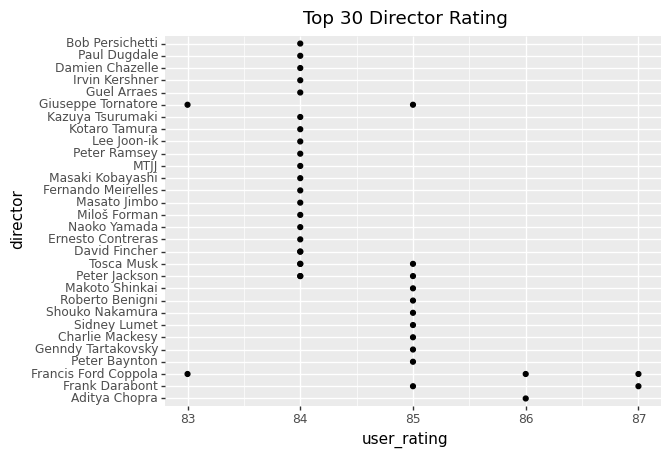

<ggplot: (8786044645819)>

In [20]:
# Rating plots of the top 30 directors
(df_sep_directors.groupby(['director']).mean().sort_values(['user_rating'], ascending=False)).index.to_list()
director_r_list = ((df_sep_directors.groupby(['director']).mean().sort_values(['user_rating'], ascending=False)).index.to_list())[:30]
director_r_cat = pd.Categorical(df_sep_directors['director'], categories=director_r_list)
df_rating = df_sep_directors.assign(director_r_cat=director_r_cat)
ggplot(df_rating.dropna(subset='director_r_cat')) + aes(x="director_r_cat", y="user_rating") + geom_point() + coord_flip() + scale_x_discrete() + labs(x='director') + ggtitle('Top 30 Director Rating')

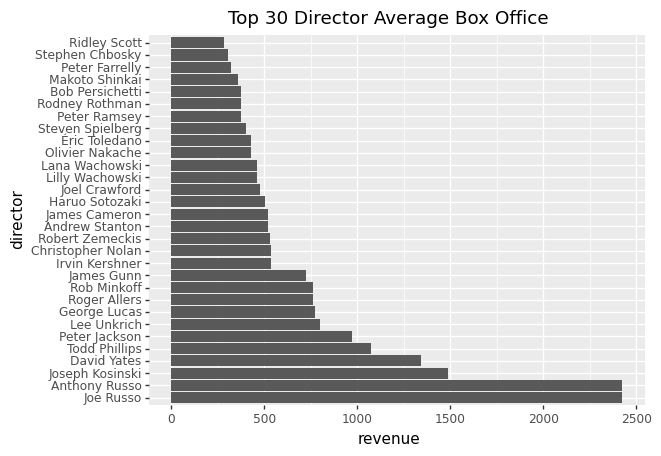

<ggplot: (8786010713260)>

In [21]:
# How much revenue the top 30 directors made
(df_sep_directors.groupby(['director']).mean().sort_values(['revenue'], ascending=False)).index.to_list()
director_bo_list = ((df_sep_directors.groupby(['director']).mean().sort_values(['revenue'], ascending=False)).index.to_list())[:30]
director_bo_cat = (pd.Categorical(((df_sep_directors.groupby(['director']).mean()).reset_index(inplace=False))['director'], categories=director_bo_list))
df_bo = (df_sep_directors.groupby(['director']).mean()).assign(director_bo_cat=director_bo_cat)
ggplot(df_bo.dropna(subset='director_bo_cat'), aes(x='director_bo_cat', y='revenue')) + geom_bar(stat='identity') + coord_flip() +labs(x='director') + ggtitle('Top 30 Director Average Box Office')

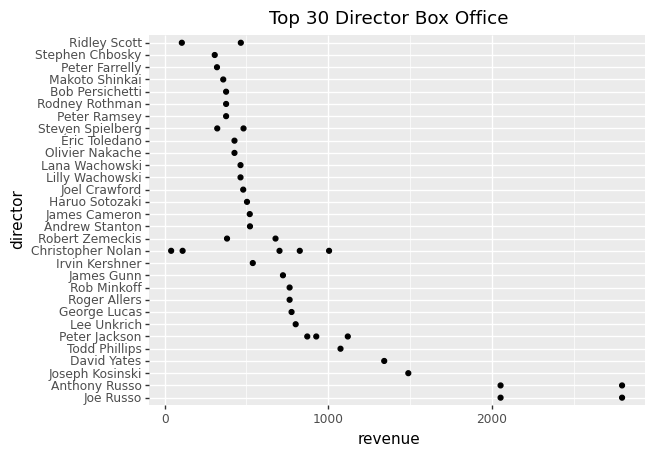

<ggplot: (8786065064186)>

In [22]:
# Revenue plots of top 30 directors
(df_sep_directors.groupby(['director']).mean().sort_values(['revenue'], ascending=False)).index.to_list()
director_bo_list = ((df_sep_directors.groupby(['director']).mean().sort_values(['revenue'], ascending=False)).index.to_list())[:30]
director_bo_cat = pd.Categorical(df_sep_directors['director'], categories=director_bo_list)
df_bo = df_sep_directors.assign(director_bo_cat=director_bo_cat)
ggplot(df_bo.dropna(subset='director_bo_cat')) + aes(x='director_bo_cat', y='revenue') + geom_point() + coord_flip() +labs(x='director') + ggtitle('Top 30 Director Box Office')

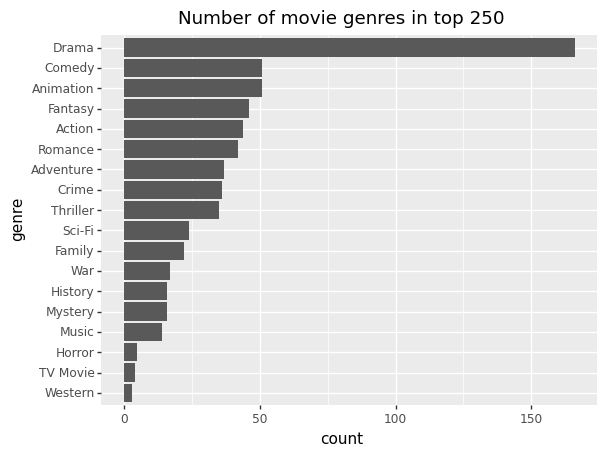

<ggplot: (8786010671797)>

In [23]:
# How many movies of each genre in TMDB
genre_list = df_sep_genre['genre'].value_counts().index.to_list()[::-1]
genre_cat = pd.Categorical(df_sep_genre['genre'], categories=genre_list)
df_sg = df_sep_genre.assign(genre_cat=genre_cat)
ggplot(df_sep_genre) + aes(x="genre_cat") + stat_bin(bins=100) + geom_bar() + coord_flip() + labs(x='genre') + ggtitle('Number of movie genres in top 250')

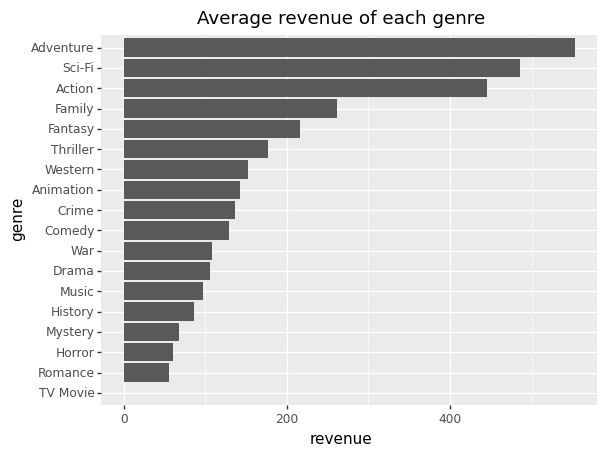

<ggplot: (8785994859012)>

In [24]:
genre_bo_list = ((df_sep_genre.groupby(['genre']).mean().sort_values(['revenue'], ascending=False)).index.to_list())[::-1] # Genre was ordered from highest to lowest
genre_bo_cat = (pd.Categorical(((df_sep_genre.groupby(['genre']).mean()).reset_index(inplace=False))['genre'], categories=genre_bo_list))
df_g_bo = (df_sep_genre.groupby(['genre']).mean()).assign(genre_bo_cat=genre_bo_cat)
ggplot(df_g_bo, aes(x="genre_bo_cat", y="revenue")) + geom_bar(stat='identity') + coord_flip() + scale_x_discrete() + labs(x='genre') + ggtitle('Average revenue of each genre')

In [25]:
df_rottom = pd.read_csv('df_rt_raw.csv')
df_rottom = df_rottom.drop('Unnamed: 0', axis='columns')
# Convert Rotten Tomatoes ratings from strings to integers (removing % sign)
list_rt_ratings = []
for i in df_rottom['user_rating'].to_list():
    list_rt_ratings.append(int(i.strip('%')))
list_rt_source_list = []
for i in range(294):
    list_rt_source_list.append('Rotten Tomatoes')

In [26]:
df_imdb = pd.read_csv('mar_22_imdb_genre_sep.csv')
df_imdb = df_imdb.drop(columns='Unnamed: 0')
df_imdb.rename(columns = {'Title':'title', 'Director':'director', 'Revenue':'revenue', 'Year':'year', 'Genre':'genre', 'Source':'source','Votes':'votes', 'User_Rating':'user_rating', 'Length':'length'}, inplace = True)
df_imdb

,title,director,year,genre,revenue,user_rating,length,source,votes
0,The Shawshank Redemption,Frank Darabont,1994,['Drama '],28.34,93,142,IMDb,"250,000 votes and above"
1,The Godfather,Francis Ford Coppola,1972,"['Crime', ' Drama ']",134.97,92,175,IMDb,"250,000 votes and above"
2,The Dark Knight,Christopher Nolan,2008,"['Action', ' Crime', ' Drama ']",534.86,90,152,IMDb,"250,000 votes and above"
3,The Lord of the Rings: The Return of the King,Peter Jackson,2003,"['Action', ' Adventure', ' Drama ']",377.85,90,201,IMDb,"250,000 votes and above"
4,Schindler's List,Steven Spielberg,1993,"['Biography', ' Drama', ' History ']",96.90,90,195,IMDb,"250,000 votes and above"
...,...,...,...,...,...,...,...,...,...
245,Memories of Murder,Bong Joon Ho,2003,"['Crime', ' Drama', ' Mystery ']",0.01,81,131,IMDb,"50,000 to 100,000 votes"
246,Million Dollar Baby,Clint Eastwood,2004,"['Drama', ' Sport ']",100.49,81,132,IMDb,"50,000 to 100,000 votes"
247,Before Sunrise,Richard Linklater,1995,"['Drama', ' Romance ']",5.54,81,101,IMDb,"50,000 to 100,000 votes"
248,How to Train Your Dragon,Dean DeBlois,2010,"['Animation', ' Action', ' Adventure ...",217.58,81,98,IMDb,"50,000 to 100,000 votes"


In [1]:
df_rt = pd.read_csv('merged_df.csv')
df_rt = df_rt.drop(columns='Unnamed: 0')
df_rt

NameError: name 'pd' is not defined

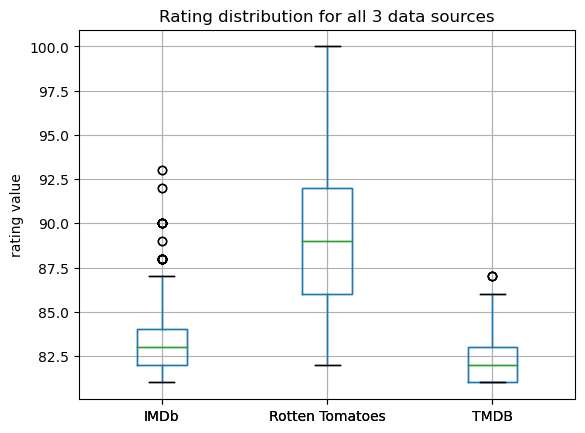

In [29]:
# rating value was cut to 80-100 from 0-100 to make the box plots look more clear
df_rt_rating_order = pd.read_csv('merged_df.csv')
df_rt_rating_order
df_rating = pd.DataFrame({'IMDb': df_imdb['user_rating'].to_list(), 'Rotten Tomatoes': df_rt_rating_order['user_rating'][:250].to_list(), 'TMDB': df['user_rating'].to_list()})
df_rating.boxplot()
plt.title('Rating distribution for all 3 data sources')
(df_rating.boxplot()).set_ylabel('rating value')
plt.show()

In [42]:
df_rt_to = pd.DataFrame({'title':(df_rt['title'].to_list())[:250], 'director':(df_rt['director'].to_list())[:250], 'genre':df_rt['genre'].to_list()[:250], 'user_rating': df_rt['user_rating'].to_list()[:250], 'source': list_rt_source_list[:250], 'votes': df_rt['votes'].to_list()[:250], 'year':df_rt['year'].to_list()[:250], 'revenue': df_rt['revenue'].to_list()[:250]})
df_rt_to
# get the RT dataframe that's separated by director
df_rt = pd.read_csv('df_rt_sep_dir.csv')
df_rt = df_rt.drop(columns='Unnamed: 0')
list_rt_ratings = []
for i in df_rt['user_rating'].to_list():
    list_rt_ratings.append(int(i.strip('%')))
df_rt['user_rating'] = list_rt_ratings
df_rt

,title,revenue,user_rating,votes,year,source,genre,director
0,Chained for Life (2019 film),0.02,54,Fewer than 50 Ratings,2019,RT,Drama,Aaron Schimberg
1,Off the Rails (2016 film),0.07,85,100+ Ratings,2016,RT,Documentary,Adam Irving
2,For the Love of Spock,19.34,82,"1,000+ Ratings",2016,RT,Documentary,Adam Nimoy
3,Vagabond (1985 film),29.94,85,"1,000+ Ratings",1985,RT,Drama,Agnès Varda
4,John Mulaney: Kid Gorgeous at Radio City,1.56,90,100+ Ratings,2018,RT,Comedy,Alex Timbers
...,...,...,...,...,...,...,...,...
289,Sleeper (1973 film),102.20,81,"25,000+ Ratings",1973,RT,Comedy,Woody Allen
290,Horror Noire,1.51,67,50+ Ratings,2019,RT,Documentary,Xavier Burgin
291,Strong Island (film),0.01,56,500+ Ratings,2017,RT,Documentary,Yance Ford
292,Seoul Station (film),2.57,38,250+ Ratings,2016,RT,Horror,Yeon Sang-ho


In [43]:
df_concat = pd.concat([df_sep_directors, df_imdb, df_rt])
df_concat = df_concat.drop(columns=['length'])
df_concat

,title,director,genre,user_rating,revenue,release date,source,votes,year
0,The Godfather,Francis Ford Coppola,"[Drama, Crime]",87,245.07,1972-03-14,TMDB,10000+ ratings,1972
1,The Shawshank Redemption,Frank Darabont,"[Drama, Crime]",87,28.34,1994-09-23,TMDB,10000+ ratings,1994
2,The Godfather Part II,Francis Ford Coppola,"[Drama, Crime]",86,102.60,1974-12-20,TMDB,10000+ ratings,1974
3,Dilwale Dulhania Le Jayenge,Aditya Chopra,"[Comedy, Drama, Romance]",86,100.00,1995-10-19,TMDB,2500+ ratings,1995
4,Schindler's List,Steven Spielberg,"[Drama, History, War]",86,321.37,1993-12-15,TMDB,10000+ ratings,1993
...,...,...,...,...,...,...,...,...,...
289,Sleeper (1973 film),Woody Allen,Comedy,81,102.20,NaN,RT,"25,000+ Ratings",1973
290,Horror Noire,Xavier Burgin,Documentary,67,1.51,NaN,RT,50+ Ratings,2019
291,Strong Island (film),Yance Ford,Documentary,56,0.01,NaN,RT,500+ Ratings,2017
292,Seoul Station (film),Yeon Sang-ho,Horror,38,2.57,NaN,RT,250+ Ratings,2016


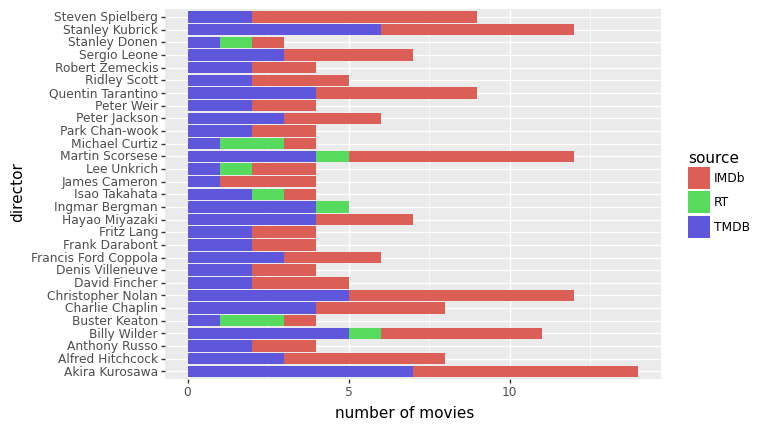

<ggplot: (8785993589176)>

In [44]:
# Getting the 30 directors who did the most films in all sources, then showing how many times they appear in each source
df_top_30_directors_all = (df_concat.groupby('director')['source'].count().sort_values(ascending=False).reset_index(inplace=False, drop=False)).head(30).sort_values('source', ascending=False)
df_top_30_directors_all['director'] = pd.Categorical((df_top_30_directors_all)['director'], categories=df_top_30_directors_all['director'][::-1])
df_top_30_directors_all
top_30_directors_list = df_top_30_directors_all['director'].to_list()
list_top30_directors_dfs = []
for i in range(30):
    a=df_concat.loc[df_concat['director']==top_30_directors_list[i]]
    list_top30_directors_dfs.append(a)
top_30_directors = pd.concat(list_top30_directors_dfs)
top_30_directors =  top_30_directors.replace('Charles Chaplin', 'Charlie Chaplin')
ggplot(top_30_directors, aes(x='director', fill='source'))+ \
geom_bar() + \
labs(x='director', y='number of movies')  + \
coord_flip() + \
scale_x_discrete() + \
ggtitle('')

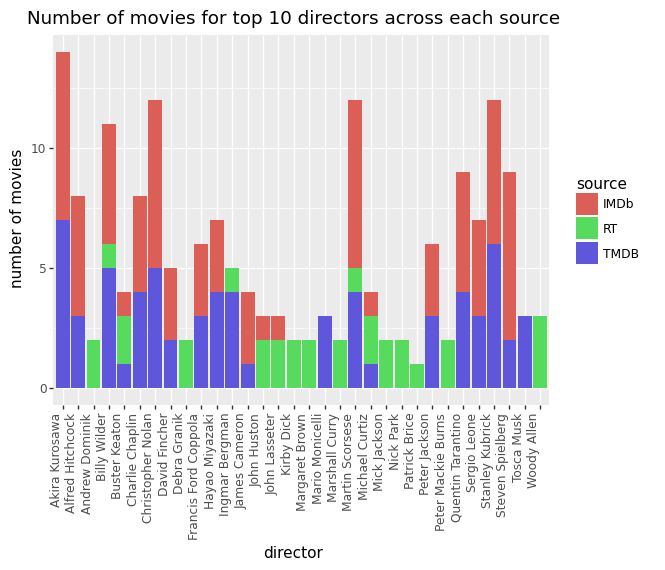

<ggplot: (8786027843828)>

In [45]:
# Get top 10 directors with most number of films from each source (removing duplicates), then showing how many films they did in each source
top_10_directors_tmdb = (df_sep_directors.groupby('director')['source'].count().sort_values(ascending=False).reset_index(inplace=False, drop=False)).head(14).sort_values('source', ascending=False)
top_10_directors_imdb = (df_imdb.groupby('director')['source'].count().sort_values(ascending=False).reset_index(inplace=False, drop=False)).head(14).sort_values('source', ascending=False)
top_10_directors_rt = (df_rt.groupby('director')['source'].count().sort_values(ascending=False).reset_index(inplace=False, drop=False)).head(14).sort_values('source', ascending=False)
top_10_directors_rt
list_top10_each_source = top_10_directors_tmdb['director'].to_list() + top_10_directors_imdb['director'].to_list() + top_10_directors_rt['director'].to_list()
list_top10_each_source = list(dict.fromkeys(list_top10_each_source))
list_top10_each_source_dfs = []
for i in range(len(list_top10_each_source)):
    a=df_concat.loc[df_concat['director']==list_top10_each_source[i]]
    list_top10_each_source_dfs.append(a)
top_10_directors_each_source = pd.concat(list_top10_each_source_dfs)
top_10_directors_each_source = top_10_directors_each_source.replace('Charles Chaplin', 'Charlie Chaplin')
ggplot(top_10_directors_each_source, aes(x='director', fill='source'))+ \
geom_bar() + \
labs(x='director', y='number of movies')  + \
scale_x_discrete() + \
ggtitle('Number of movies for top 10 directors across each source') + \
theme(axis_text_x=element_text(rotation=90, hjust=1))

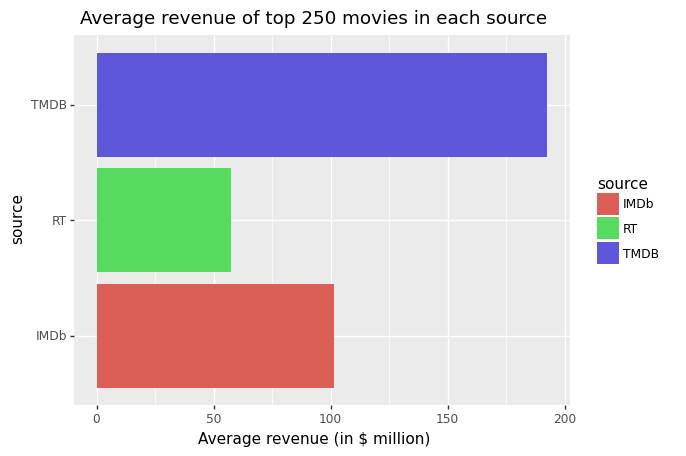

<ggplot: (8785993791296)>

In [46]:
ggplot(df_concat.groupby(['source']).mean().reset_index(inplace=False), aes(x='source', y='revenue', fill='source'))+ \
geom_bar(stat='identity') + \
labs(x='source', y='Average revenue (in $ million)')  + \
coord_flip() + \
scale_x_discrete() + \
ggtitle('Average revenue of top 250 movies in each source')